In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introducción LIME

Local Interpretable Model-agnostic Explanations

## Regresión Lineal

In [2]:
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

In [3]:
num_datos = 200

np.random.seed(42)
x1 = np.random.randn(num_datos)*100 + np.random.rand(num_datos)*100
x2 = np.random.randn(num_datos)*20 + np.random.rand(num_datos)*50

clase = x1 * 1/2 + 10 < x2

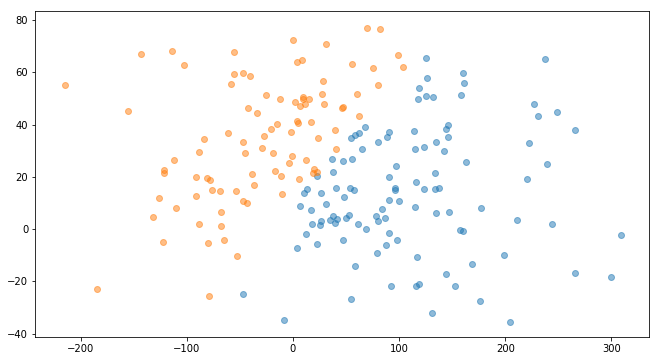

In [4]:
plt.rcParams['figure.figsize'] = (11,6)
plt.scatter(x1[~clase], x2[~clase], alpha=0.5)
plt.scatter(x1[clase], x2[clase], alpha=0.5)
plt.show()

In [5]:
lr = LogisticRegression(solver='liblinear')

X = np.vstack([x1,x2]).T

lr.fit(X, clase)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

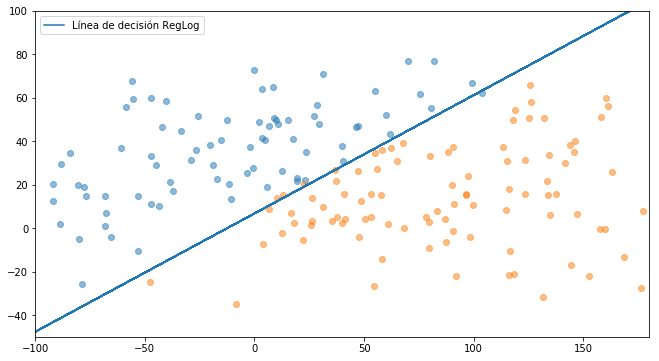

In [6]:
# plt.rcParams['figure.figsize'] = (11,6)
plt.scatter(x1[clase], x2[clase], alpha=0.5)
plt.scatter(x1[~clase], x2[~clase], alpha=0.5)
plt.plot(x1, (-lr.intercept_-lr.coef_[0][0]*x1) / lr.coef_[0][1],
        label='Línea de decisión RegLog')
plt.ylim(-50, 100)
plt.xlim(-100, 180)

plt.legend()

plt.show()

In [7]:
explainer = LimeTabularExplainer(
    X,
    feature_names=['x1', 'x2'],
    class_names=['azul', 'naranja'],
    discretize_continuous=False)

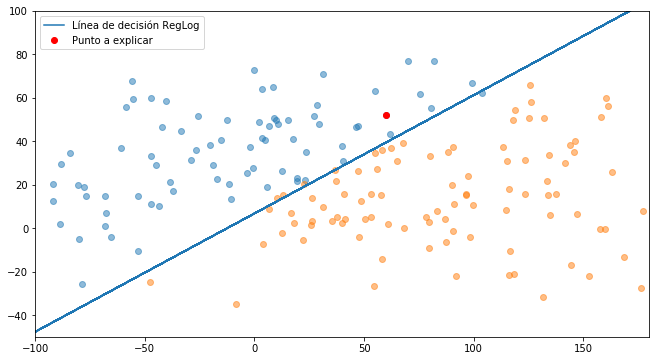

In [8]:
# plt.rcParams['figure.figsize'] = (11,6)
plt.scatter(x1[clase], x2[clase], alpha=0.5)
plt.scatter(x1[~clase], x2[~clase], alpha=0.5)
plt.plot(x1, (-lr.intercept_-lr.coef_[0][0]*x1) / lr.coef_[0][1],
        label='Línea de decisión RegLog')
plt.ylim(-50, 100)
plt.xlim(-100, 180)

plt.plot(x1[1], x2[1], 'ro', label="Punto a explicar")

plt.legend()
plt.show()

### ¿Qué significa interpetar esto?

Podríamos usar la pregunta: 
> ¿Qué debí haber cambiado para cambiar mi decisión?

La respuesta a esto podría ser la distancia más corta a la línea de decisión.

Ecuación de la recta normal $$ c_1 x_2 - c_2 x_1 = 0 $$

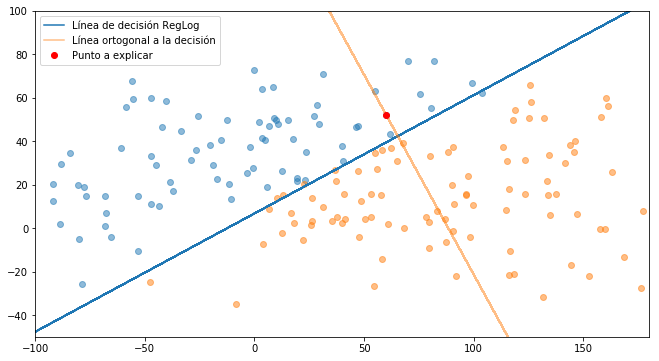

In [9]:
# plt.rcParams['figure.figsize'] = (11,6)
plt.scatter(x1[clase], x2[clase], alpha=0.5)
plt.scatter(x1[~clase], x2[~clase], alpha=0.5)
plt.plot(x1, -lr.intercept_/ lr.coef_[0][1]-
         (lr.coef_[0][0] / lr.coef_[0][1]) * x1,
        label='Línea de decisión RegLog')
plt.plot(x1, x1 * (lr.coef_[0][1] / lr.coef_[0][0]) + 162.5,
        label='Línea ortogonal a la decisión', alpha=0.5)
plt.ylim(-50, 100)
plt.xlim(-100, 180)

plt.plot(x1[1], x2[1], 'ro', label="Punto a explicar")

plt.legend()
plt.show()

In [10]:
exp = explainer.explain_instance(X[1,:], lr.predict_proba)

In [11]:
exp.show_in_notebook()

In [12]:
exp.as_list()

[('x1', -0.4866874981199363), ('x2', 0.2415804351305946)]

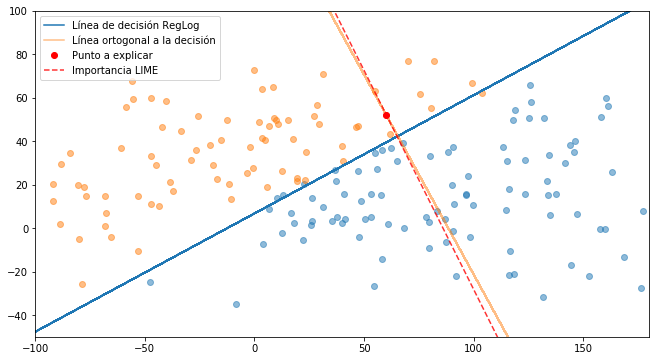

In [13]:
# plt.rcParams['figure.figsize'] = (11,6)
plt.scatter(x1[~clase], x2[~clase], alpha=0.5)
plt.scatter(x1[clase], x2[clase], alpha=0.5)
plt.plot(x1, -lr.intercept_/ lr.coef_[0][1]-
         (lr.coef_[0][0] / lr.coef_[0][1]) * x1,
        label='Línea de decisión RegLog')
plt.plot(x1, x1 * (lr.coef_[0][1] / lr.coef_[0][0]) + 162.5,
        label='Línea ortogonal a la decisión', alpha=0.5)
plt.ylim(-50, 100)
plt.xlim(-100, 180)

plt.plot(x1[1], x2[1], 'ro', label="Punto a explicar")


m = exp.as_list()[0][1]/exp.as_list()[1][1]
x_ini = -50
x_fin = 150
y_ini = (x_ini - x1[1]) * m + x2[1]
y_fin = (x_fin - x1[1]) * m + x2[1]

plt.plot(
    [x_ini,x_fin],
    [y_ini,y_fin],
    alpha=0.8, color='r', linestyle='dashed',
    label='Importancia LIME')

plt.legend()
plt.show()

## Random Forest

In [14]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap

In [15]:
X_2, y = make_moons(1000, noise=0.3, random_state=42)

x_min, x_max = X_2[:, 0].min() - .5, X_2[:, 0].max() + .5
y_min, y_max = X_2[:, 1].min() - .5, X_2[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

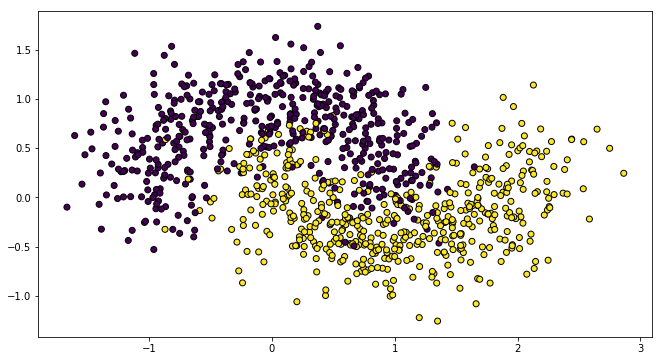

In [16]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y, edgecolors='k')
plt.show()

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

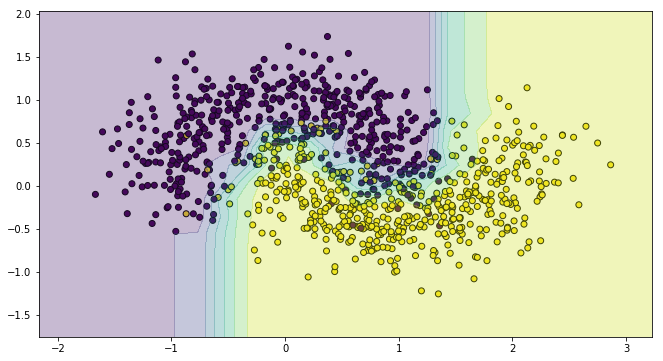

In [29]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y, edgecolors='k')

if hasattr(rf, "decision_function"):
    Z = rf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.3)
plt.show()

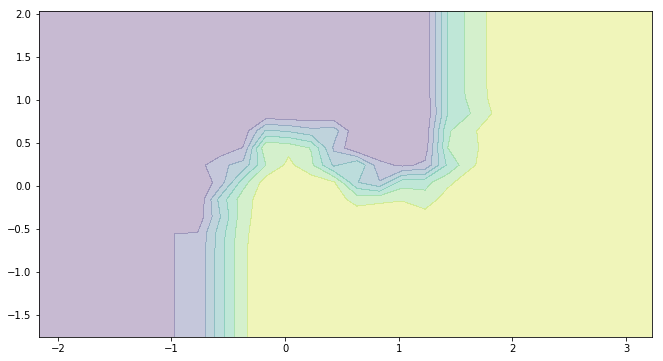

In [30]:
if hasattr(rf, "decision_function"):
    Z = rf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.3)
plt.show()

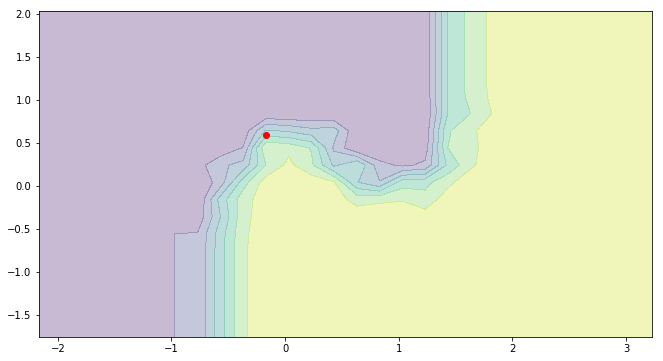

In [31]:
if hasattr(rf, "decision_function"):
    Z = rf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.3)

plt.plot(X_2[0,0], X_2[0,1], 'ro')
plt.show()

In [21]:
punto = X_2[0,:].reshape(1, 2)

print("Predicción:", rf.predict(punto)[0])
print("Probabilidad:", rf.predict_proba(punto)[0][1])
print("Valor real:", y[0])

Predicción: 1
Probabilidad: 0.87
Valor real: 1


In [22]:
explainer_rf = LimeTabularExplainer(
    X_2,
    feature_names=['x1', 'x2'],
    class_names=['amarillo', 'azul'],
    discretize_continuous=False)

In [23]:
exp_rf = explainer_rf.explain_instance(X_2[0,:], rf.predict_proba)

In [24]:
exp_rf.show_in_notebook()

In [25]:
exp_rf.as_list()

[('x2', -0.3440055939344644), ('x1', 0.08417426048350746)]

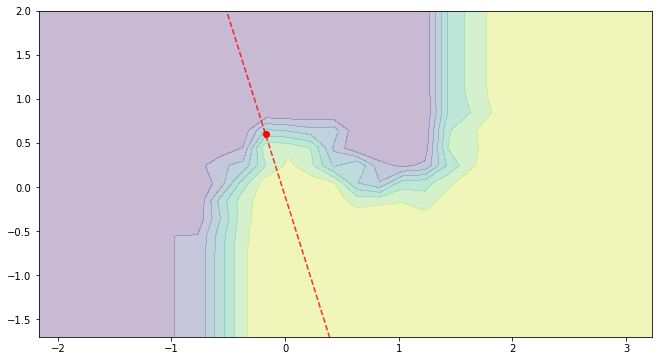

In [32]:
if hasattr(rf, "decision_function"):
    Z = rf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.3)

plt.plot(X_2[0,0], X_2[0,1], 'ro')

m = exp_rf.as_list()[0][1]/exp_rf.as_list()[1][1]
x_ini = -2
x_fin = 3
y_ini = (x_ini - X_2[0,0]) * m + X_2[0,1]
y_fin = (x_fin - X_2[0,0]) * m + X_2[0,1]

plt.plot(
    [x_ini,x_fin],
    [y_ini,y_fin],
    alpha=0.8, color='r', linestyle='dashed',
    label='Importancia LIME')


plt.ylim(-1.7,2)
plt.show()

In [33]:
def plot_random_points_lime(model, n_points=10):
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.3)

    puntos = X_2[np.random.choice(range(X_2.shape[0]), n_points),:]

    for punto in puntos:

        plt.plot(punto[0], punto[1], 'ro')
        exp_rf = explainer_rf.explain_instance(
            punto,
            model.predict_proba)

        m = exp_rf.as_list()[0][1]/exp_rf.as_list()[1][1]
        x_ini = -2
        x_fin = 3
        y_ini = (x_ini - punto[0]) * m + punto[1]
        y_fin = (x_fin - punto[0]) * m + punto[1]

        plt.plot(
            [x_ini,x_fin],
            [y_ini,y_fin],
            alpha=0.5, color='r', linestyle='dashed',
            label='Importancia LIME')

    plt.ylim(-1.7,2)
    plt.show()

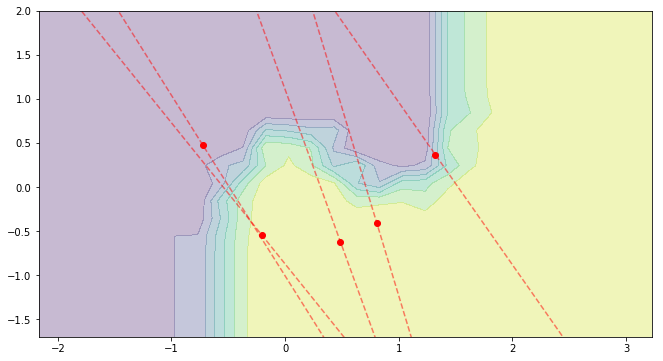

In [34]:
plot_random_points_lime(rf, 5)

**Ejercicio**: Para el dataset *X_2*, entrena algún otro modelo y evalúa la función **plot_random_points_lime** para observar las direcciones de decisión de LIME para ese modelo.